# IMPORTANDO ARQUIVOS DE DADOS


 <a href="mailto:siqueira@usp.br?subject=Dúvida sobre ANOVA">José O. Siqueira (siqueira@usp.br)</a><br>
 
 <a href="mailto:paulo.silveira@fm.usp.br?subject=Dúvida sobre ANOVA">Paulo S. P Silveira (paulo.silveira@fm.usp.br)</a> <br>
 
 <a href="mailto:koichi.sameshima@fm.usp.br?subject=Dúvida sobre ANOVA">Koichi Sameshima (koichi.sameshima@fm.usp.br)</a> <br>
<br>

## Exemplo 4.1 de Sardanelli & Di Leo (2008)

> **Example 4.1.** Measuring myocardial delayed enhancement in cardiac MR imaging. Let us suppose we want to evaluate the difference in delayed enhancement of the myocardium provided by **two contrast agents (CAs)**. A sample of 50 post-ischemic patients undergo a cardiac MR with inversion recovery turbo- gradient-echo sequence ten minutes after the injection of 0.1 mmol/kg of CA 1. The signal intensity (SI), expressed in arbitrary units (a.u.), is measured in a region of interest placed in the infarcted myocardium. A second sample made up of another 50 post-ischemic patients is studied with the same technique but using 0.1 mmol/kg of CA 2. Data are summarized in Tables 4.2 and 4.3.

### Resultados com CA1

<p align="center">
    <center><img src="./image/Table_4_2.png" alt="drawing" width="500"/></center>
</p>

### Resultados com CA2

<p align="center">
    <center><img src="./image/Table_4_3.png" alt="drawing" width="500"/></center>
</p>

## Arquivos e Diretórios/Pastas no R

Em ambiente R e no Jupyter Notebook, todos os arquivos serão lidos e salvos no diretório ativo, a menos que se especifique o contrário. Logo, a primeira coisa que você precisa se preocupar é como obter e configurar seu **diretório de trabalho**.
```{R}
# Para obter o diretório de trabalho corrente, execute:
getwd ()
 
#Configure o diretório de trabalho:
setwd ("C:/Documents and Settings/Aula06")
````

### Diretório de Trabalho

Os códigos ou comandos executados a seguir assumirão que os arquivos de dados estão localizados num diretório relativo ao **diretório de trabalho R do Jupyter Notebook**. O diretório atual pode ser verificado com a função getwd. Assim no meu caso:

In [1]:
getwd()               # get current working directory

[1] "/Users/koichi/Dropbox/0Aulas/mdr5728_2020/Aula06/R_Tidy_data"

Poderá selecionar diferentes diretórios de trabalho com a função `setwd()`, evitando-se assim a necessidade de especificar o caminho completo para arquivos de dados para leitura e gravação. Neste exemplo criou-se um diretório "Sardanelli" no caminho obtido por getwd(). Vamos verificar isso por meio da função `list.files()`:

In [2]:
list.files()

[1] "anorexia_A.txt"                      "anorexia_B.txt"                     
 [3] "anorexigenos_log.xls"                "anorexigenos.xls"                   
 [5] "cheat_sheet_data-import.pdf"         "Data"                               
 [7] "image"                               "Importar_Arquivo_de_Dados.ipynb"    
 [9] "Sardanelli"                          "Sardanelli_demo_exemplos_2008.ipynb"
[11] "tidy_data_slides.ipynb"              "tidy_data.ipynb"                    
[13] "Untitled.ipynb"

Pronto, podemos verificar que há um arquivo ou diretório denominado **Sardanelli**.

In [3]:
dir.exists("Sardanelli")  # Vamos testar se Sardanelli existe como um diretório ou não.

[1] TRUE

In [4]:
# Verifica-se neste caso que Sardanelli é um diretório. Assim teremos sucesso em executar o seguinte comando
setwd("Sardanelli")   # set working directory para o subdiretório ./Sardanelli

In [5]:
getwd()

[1] "/Users/koichi/Dropbox/0Aulas/mdr5728_2020/Aula06/R_Tidy_data/Sardanelli"

Como pode ser verificado por meio de **`getwd()`**, o diretório corrente foi configurado para o subdiretório `./Aula06/Tidying_data/Sardanelli`. 
Note que a barra normal (/) deve ser usada no abiente R como separador de diretórios, mesmo na plataforma Windows, ao invés da barra invertida (\).
Por exemplo
`> setwd("C:/Users/usuario/Documents")`

### Listando os arquivos e as pastas no diretório

```{R}
#lista arquivos no diretório de trabalho
list.files()
 
#lista arquivos in a specific folder
list.files (path = "C:/Folder/Subfolder1/Subfolder2")
 
#lista arquivos no diretório escolhido, choose.dir() funciona somente no Windows
list.files(path = choose.dir())
 
#lista de subdiretórios e arquivos dentro dos subdiretórios recursivamente
list.files(recursive = TRUE)
 
#obtém o nome completo (caminho e nome de arquivos) de cada arquivo
list.files(full.name = TRUE)
```

#### Se a lista obtida for muito longa,  poderá filtrar os resultados usando o argumento padrão da função `list.files()`

```{R}
#lista todos os arquivos que contêm a palavra "anorex"
list.files(pattern = "anorex")
 
#lista arquivos que termina com a palavra "csv"
list.files (pattern = "csv$")
 
#lista arquivos que começam com a palavra "anorex" seguida por quaisquer characteres e finalizado com "xlsx":
list.files(pattern = "^anorex(.*)xlsx$")
```

#### Expressões regulares

> Se ficou curioso o que são os símbolos "^", ".", "*", "<span>$</span>" nos comandos acima, bem estes são chamados **metacaracteres em expressões regulares**. Se você quiser saber mais sobre expressões regulares, consultem estas duas fontes: [Cheat Sheet de "Expressões Regulares"](https://rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf) ou ["Expressões Regulares" que um programador R deve saber](https://www.r-bloggers.com/regular-expressions-every-r-programmer-should-know/).

In [6]:
# Retornando ao diretório inicial
setwd("../")
# Verificando se o arquivo anorexigenos.xls
getwd()
list.files(pattern = "^anorex(.*)xls$")

[1] "/Users/koichi/Dropbox/0Aulas/mdr5728_2020/Aula06/R_Tidy_data"

[1] "anorexigenos_log.xls" "anorexigenos.xls"

### Checking if a file or folder exists

Como exercício vamos checar se o arquivo "anorexigenos.xls" existe no diretório de trabalho.
A função para verificação é:
> `file.exists("filename.extension")`

In [7]:
file.exists("anorexigenos.xls")

[1] TRUE

Podemos ver que o resultado é TRUE, de modo que o arquivo em questão existe!

Agora vamos inicialmente checar se a pasta "Data" existe diretório corrente, se não existir cria-se o diretório:

In [8]:
ifelse(!dir.exists("Data"), dir.create("Data"), "Diretorio já existe!") # Execute esta linha de comando mais uma vez.

[1] "Diretorio já existe!"

## Importando dados para Data.Frame

[Tutorial genérico para importação dados em R](http://www.r-tutor.com/r-introduction/data-frame/data-import)

### Arquivos textos

In [9]:
si_ca1 = read.table("./Sardanelli/table_4_2.txt",header=TRUE)  # read text file 
si_ca2 = read.table("./Sardanelli/table_4_3.txt",header=TRUE)  # read second text file

In [10]:
head(si_ca1)

,Individual,SI
,<int>,<dbl>
1,1,38.74
2,2,39.26
3,3,39.13
4,4,40.56
5,5,37.18
6,6,38.61


In [11]:
head(si_ca2)

,Individual,SI
,<int>,<dbl>
1,1,50.36
2,2,51.04
3,3,50.87
4,4,52.73
5,5,48.33
6,6,50.19


In [12]:
tail(si_ca1)
mean(si_ca1$SI)

,Individual,SI
,<int>,<dbl>
45,45,38.74
46,46,38.60
47,47,39.00
48,48,39.13
49,49,38.74
50,50,39.13


[1] 39.0182

In [13]:
tail(si_ca2)
mean(si_ca2$SI)

,Individual,SI
,<int>,<dbl>
45,45,50.36
46,46,50.18
47,47,50.70
48,48,50.87
49,49,50.36
50,50,50.87


[1] 50.724

### Importando arquivo em formato CSV

**CSV = comma separated values**

In [14]:
si_ca1_csv = read.csv("./Sardanelli/table_4_2.csv")  # read text file 
si_ca2_csv = read.csv("./Sardanelli/table_4_3.csv")  # read second text file 
head(si_ca1_csv)
head(si_ca2_csv)

,Individual,SI
,<int>,<dbl>
1,1,38.74
2,2,39.26
3,3,39.13
4,4,40.56
5,5,37.18
6,6,38.61


,Individual,SI
,<int>,<dbl>
1,1,50.36
2,2,51.04
3,3,50.87
4,4,52.73
5,5,48.33
6,6,50.19


Vamos calcular o sumário da Tabela 4.2:

In [15]:
summary(si_ca1_csv)

   Individual          SI       
 Min.   : 1.00   Min.   :35.62  
 1st Qu.:13.25   1st Qu.:38.34  
 Median :25.50   Median :39.06  
 Mean   :25.50   Mean   :39.02  
 3rd Qu.:37.75   3rd Qu.:39.75  
 Max.   :50.00   Max.   :42.25  

## Cálculo do Erro Padrão da Média (EPM)

Leia sobre EPM em [An R Companion for the Handbook of Biological Statistics - SEM](https://rcompanion.org/rcompanion/c_03.html) e [neste site de John H. McDonald](http://www.biostathandbook.com/standarderror.html). 

**Recomendamos**: Este site elaborado por Salvatore S. Mangiafico é uma excelente fonte para praticantes da análise estatística em R. 

No R, o erro padrão da média (EPM) pode ser calculado com funções padrão no pacote de estatísticas nativas. Similar à função `summary( )`, existe uma função de **descrição no pacote psych**, `describe( )`, que inclui o cálculo do erro padrão da média junto com outras estatísticas descritivas. Esta função é útil para resumir várias variáveis em um quadro de dados. Nesse caso é interessante que os dados estejam no formato WIDE.

In [16]:
# Instala o pacote/bliblioteca `psych` se ainda não está presente
if (!require("psych")) install.packages("psych",repo="https://vps.fmvz.usp.br/CRAN/",dep=TRUE)

Loading required package: psych



In [17]:
library(psych)

### Cálculo de EPM manualmente

$$ \large {EPM = \frac{\text{desvio-padrão}}{\sqrt{N}}}$$


In [18]:
# Aplicação acima para cálculo do EPM para os contrastes CA1 e CA2.
se_ca1 <- sd(si_ca1$SI)/sqrt(length(si_ca1$SI[!is.na(si_ca1$SI)])) # se = standard error ~ epm
se_ca2 <- sd(si_ca2$SI)/sqrt(length(si_ca2$SI[!is.na(si_ca2$SI)]))

cat('sd_ca1 = ', sd(si_ca1$SI), '; sd_ca2 = ', sd(si_ca2$SI), '; ')
cat('se_ca1 = ', se_ca1, '; se_ca2 = ', se_ca2)

sd_ca1 =  1.460874 ; sd_ca2 =  1.899586 ; se_ca1 =  0.2065988 ; se_ca2 =  0.2686421

In [19]:
str(si_ca1)

'data.frame':	50 obs. of  2 variables:
 $ Individual: int  1 2 3 4 5 6 7 8 9 10 ...
 $ SI        : num  38.7 39.3 39.1 40.6 37.2 ...


In [20]:
tail(si_ca1)

,Individual,SI
,<int>,<dbl>
45,45,38.74
46,46,38.60
47,47,39.00
48,48,39.13
49,49,38.74
50,50,39.13


In [21]:
head(si_ca1)

,Individual,SI
,<int>,<dbl>
1,1,38.74
2,2,39.26
3,3,39.13
4,4,40.56
5,5,37.18
6,6,38.61


In [22]:
help(read.table)

In [23]:
filename <- "./Sardanelli/table_4_2.txt"
data1_csv <- read.csv(filename, sep = " ", quote = "\"",
         dec = ".", fill = TRUE)

In [24]:
head(data1_csv)

,Individual,SI
,<int>,<dbl>
1,1,38.74
2,2,39.26
3,3,39.13
4,4,40.56
5,5,37.18
6,6,38.61


### Acrescentando terceira coluna, a variável tipo de **contrast**

In [25]:
si_ca1$contrast <- "CA1"
si_ca2$contrast <- "CA2"

head(si_ca1)
head(si_ca2)

,Individual,SI,contrast
,<int>,<dbl>,<chr>
1,1,38.74,CA1
2,2,39.26,CA1
3,3,39.13,CA1
4,4,40.56,CA1
5,5,37.18,CA1
6,6,38.61,CA1


,Individual,SI,contrast
,<int>,<dbl>,<chr>
1,1,50.36,CA2
2,2,51.04,CA2
3,3,50.87,CA2
4,4,52.73,CA2
5,5,48.33,CA2
6,6,50.19,CA2


## Juntando dois dataframes ou arquivos 

Dois conjunto de dataframes com nomes de colunas comuns podem ser juntados

In [26]:
si_total <- rbind(si_ca1, si_ca2)
head(si_total)
tail(si_total)

,Individual,SI,contrast
,<int>,<dbl>,<chr>
1,1,38.74,CA1
2,2,39.26,CA1
3,3,39.13,CA1
4,4,40.56,CA1
5,5,37.18,CA1
6,6,38.61,CA1


,Individual,SI,contrast
,<int>,<dbl>,<chr>
95,45,50.36,CA2
96,46,50.18,CA2
97,47,50.70,CA2
98,48,50.87,CA2
99,49,50.36,CA2
100,50,50.87,CA2


### LONG => WIDE

In [27]:
library(tidyr)
si_total_wide <- spread(si_total, contrast, SI)

In [28]:
head(si_total_wide)

,Individual,CA1,CA2
,<int>,<dbl>,<dbl>
1,1,38.74,50.36
2,2,39.26,51.04
3,3,39.13,50.87
4,4,40.56,52.73
5,5,37.18,48.33
6,6,38.61,50.19


## Gerando sumários dos dados

In [29]:
library(psych)

In [30]:
summary(si_total_wide)

   Individual         CA1             CA2       
 Min.   : 1.00   Min.   :35.62   Min.   :46.31  
 1st Qu.:13.25   1st Qu.:38.34   1st Qu.:49.85  
 Median :25.50   Median :39.06   Median :50.78  
 Mean   :25.50   Mean   :39.02   Mean   :50.72  
 3rd Qu.:37.75   3rd Qu.:39.75   3rd Qu.:51.67  
 Max.   :50.00   Max.   :42.25   Max.   :54.93  

In [31]:
# A função describe do pacote psych requer dados no formato WIDE
describe(si_total_wide)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Individual,1,50,25.5000,14.577380,25.500,25.50000,18.532500,1.00,50.00,49.00,0.000000000,-1.2722024,2.0615528
CA1,2,50,39.0182,1.460874,39.065,39.01375,1.097124,35.62,42.25,6.63,0.002176188,-0.1042467,0.2065988
CA2,3,50,50.7240,1.899586,50.785,50.71800,1.423296,46.31,54.93,8.62,0.003450425,-0.1050502,0.2686421


Note que os valores de EPM, **se** em inglês, estão na última coluna à direita. `describe()` emite um relatório mais completo que a função `summary()`.

## Visualizar os dados por box plots

Fonte: [Statistical tools for high-throughput data analysis](http://www.sthda.com/english/wiki/paired-samples-t-test-in-r)

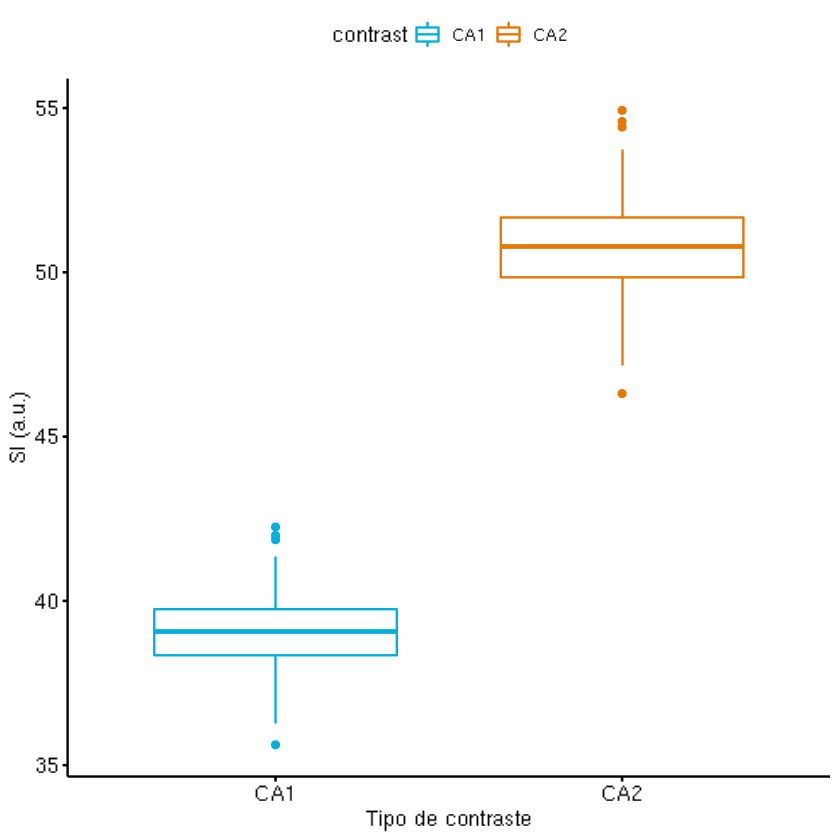

In [39]:
if (!require("ggpubr")) install.packages("ggpubr",repo="https://vps.fmvz.usp.br/CRAN/",dep=TRUE)

library(ggpubr)

# Note que aqui é necessário usar o formato LONG de dados

ggboxplot(si_total, x = "contrast", y = "SI", 
          color = "contrast", palette = c("#00AFDD", "#E77700"),
          order = c("CA1", "CA2"),
          ylab = "SI (a.u.)", xlab = "Tipo de contraste")

Pela visualização do **box plot** fica evidente que o sinal gerado pelo contraste CA2 é bem maior que o do contraste CA1.

Com isso poderíamos ter feito um teste monocaudal de tal sorte que a hipótese alternativa poderia ser  $H_1: si_{CA2} > si_{CA2}$

Mas insistiremos no teste bicaudal:

## Teste t não pareado bicaudal

Neste caso o teste estatístico é 

> $H_0: \mu_{CA1} = \mu_{CA2}$;  
> $H_1: \mu_{CA1} \neq \mu_{CA2}$.  
> $\alpha = 5%$

In [33]:
?t.test # Para visualizar o help de t.test

In [34]:
t.test(si_total_wide$CA2,
       si_total_wide$CA1,
       paired=FALSE,
       alternative="two.sided",  # bicaudal
       mu = 0,                   # 
       conf.level=0.95)


	Welch Two Sample t-test

data:  si_total_wide$CA2 and si_total_wide$CA1
t = 34.541, df = 91.94, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11.03271 12.37889
sample estimates:
mean of x mean of y 
  50.7240   39.0182 


***

<p align="center">
    <center><img src="./image/sardanelli_t_teste_SI.png" alt="drawing" width="600"/></center>
</p>

## Reordenando a posição das colunas

Parece ser lógico ordenar as variáveis de coluna hierarquicamente, por exemplo, nessa ordem: **contrast** => **Individual** => **SI**.
<br>
Há diversas maneiras de se obter este efeito em R. Vejamos quatro métodos:

In [ ]:
### Reordenação método 1
si_total[, c(3, 1, 2)]  # A primeira vírgula sinaliza que todas as linhas devem ser mantidas, 
                        # e 3, 1, 2 refere-se a ordem das colunas.

In [ ]:
### Reordenação método 2
si_total[, c("contrast", "Individual", "SI")] # Vide observação acima.

In [ ]:
### Reordenação método 3
subset(si_total, select = c(3, 1, 2))

In [ ]:
### Reordenação ou pipeline por meio do dplyr método 4
if (!require("dplyr")) install.packages("dplyr", repo = "https://vps.fmvz.usp.br/CRAN/", 
    dep = TRUE)
library(dplyr)

si_total %>% select(contrast, Individual, SI) # %>% indica operação de pipeline do dplyr 